### IMPORTACION DE MODULOS 

In [1]:
# Importamos los modulos necesarios y cargamos la base de datos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import statsmodels.api as sm
# Procesamiento de la base de datos 

df= pd.read_excel("enut2021_base.xlsx")

### PROCESAMIENTO Y DEFINICION DE VARIABLES

In [2]:
df_1= df.copy()

# Seleccionamos las variables de interes 
variables_de_interes = [ 'REGION' , 'EDAD_SEL' , 'BHCH04_SEL' , 'SEXO_SEL' , 'BHCH06_SEL' , 'BHCH07_SEL' , 'NIVEL_EDUCATIVO_SEL' , 'CANT_MIEMBROS_HOGAR' , 'CANT_PERSONASHASTA13' , 'CANT_PERSONAS14A64' , 'CANT_PERSONAS65YMAS' , 'CANT_DEMANDANTES_TOTAL' , 'CANT_NODEMANDANTES_TOTAL' , 'CANT_DEMANDANTES_14A64' , 'CANT_DEMANDANTES_65YMAS' , 'TIPO_HOGAR_DCTOTAL' , 'TIPO_HOGAR_DCHASTA13' , 'TIPO_HOGAR_DC14YMAS' , 'TIPO_HOGAR_DCAMBOS' , 'TIPO_HOGAR_DCPOREDAD' , 'BHSL08_SEL' , 'BHSL11_SEL' , 'BHSL12_SEL' , 'CONDICION_ACTIVIDAD' , 'MAYORESACARGO_TOTAL' , 'T_DOMESTICO_PAGO' , 'T_DOMESTICO_MIEMBROS' , 'DIA_SEMANA' , 'DIA_LABORABLE' , 'TSS_GRANGRUPO_TRABAJOTOTAL' , 'TSS_GRANGRUPO_OCUPACIONYAUTOCONSUMO' , 'TSS_GRANGRUPO_TNR' , 'TSS_GRANGRUPO_PERSONALES' , 'TSS_GRUPO_TRABAJOOCUPACION' , 'TSS_GRUPO_DOMESTICO' , 'TSS_GRUPO_CUIDADO' , 'TSS_GRUPO_TNROTROSHOGARES_VOLUNTARIAS' , 'TSS_GRUPO_VOLUNTARIAS' , 'TSS_GRUPO_EDUCACION' , 'TSS_GRUPO_CONVIVENCIA' , 'TSS_GRUPO_USODEMEDIOS' , 'TSS_GRUPO_CUIDADOPERSONAL' , 'TSS_GRUPO_CPERSONALSINDORMIR' , 'TSS_ACT_AUTOCONSUMO' , 'TSS_ACT_TRABAJOOCUPACION' , 'TSS_ACT_BUSCARTRABAJO' , 'TSS_ACT_PASANTIANR' , 'TSS_ACT_TRASLADOTRABAJO' , 'TSS_GRUPO_PREPARARCOMIDA' , 'TSS_ACT_LIMPIAR' , 'TSS_ACT_LAVARPLANCHAR' , 'TSS_ACT_REPARARLAVIVIENDA' , 'TSS_ACT_HACERPAGOS' , 'TSS_ACT_HACERCOMPRAS' , 'TSS_ACT_CUIDARMASCOTAS' , 'TSS_ACT_VOLUNTARIOCOMUNIDAD' , 'TSS_ACT_VOLUNTARIOSFL' , 'TSS_ACT_AYUDAFAMILIARES' , 'TSS_ACT_AYUDANOFAMILIARES' , 'TSS_ACT_ESTUDIAR' , 'TSS_ACT_TRASLADOESTUDIO' , 'TSS_ACT_REUNIRSEAMIGOS' , 'TSS_ACT_CELEBRACIONES' , 'TSS_ACT_ASISTIRAESPECTACULOS' , 'TSS_ACT_ARTISTICASJUEGOS' , 'TSS_ACT_DEPORTE' , 'TSS_ACT_LEERLIBROS' , 'TSS_ACT_VERTELEVISION' , 'TSS_ACT_ESCUCHARMUSICA' , 'TSS_ACT_USARCOMPUTADORA' , 'TSS_ACT_USARCELULAR' , 'TSS_ACT_HIGIENEPERSONAL' , 'TSS_ACT_CUIDARLASALUD' , 'TSS_ACT_TRASLADOSALUD' , 'TSS_ACT_COMERYBEBER' , 'TSS_ACT_DORMIR' , 'TSS_ACT_DESCANSARYOTRAS' , 'TSS_ACT_CUIDADO_PERSONAL_DISCAPACIDAD' , 'TSS_ACT_CUIDADO_PERSONAL_0A13' , 'TSS_ACT_CUIDADO_PERSONAL_14A64' , 'TSS_ACT_CUIDADO_PERSONAL_65YMAS' , 'TSS_ACT_CUIDADO_SALUD_DISCAPACIDAD' , 'TSS_ACT_CUIDADO_SALUD_0A13' , 'TSS_ACT_CUIDADO_SALUD_14A64' , 'TSS_ACT_CUIDADO_SALUD_65YMAS' , 'TSS_ACT_CUIDADO_TRASLADOS_DISCAPACIDAD' , 'TSS_ACT_CUIDADO_TRASLADOS_0A13' , 'TSS_ACT_CUIDADO_TRASLADOS_14A64' , 'TSS_ACT_CUIDADO_TRASLADOS_65YMAS' , 'TSS_ACT_CUIDADO_OTROS_DISCAPACIDAD' , 'TSS_ACT_CUIDADO_OTROS_0A13' , 'TSS_ACT_CUIDADO_OTROS_14A64' , 'TSS_ACT_CUIDADO_OTROS_65YMAS' , 'TSS_ACT_CUIDADO_APOYO_0A13']
df_1= df_1[variables_de_interes]

# Seleccionamos las observaciones correspondientes a dias de semana 
print(df_1['DIA_SEMANA'].unique()) # 1 Es dia de semana y 2 fin de semana 
print(df_1['DIA_SEMANA'].value_counts()) # Para mayor contabilidad dado que contamos con una cantidad de observaciones suficiente trabajamos solo con los ias de semana para tener mayor comparabilidad entre observaciones
df_1 = df_1[df_1['DIA_SEMANA'] == 1].reset_index(drop=True)
df_1 = df_1.drop(columns=['DIA_SEMANA'])

# Normalizamos el tiempo declarado en cada actividad para evitar valores incongruentes, asegurando que todos cumplan con las 24 horas
actividades = ['TSS_ACT_AUTOCONSUMO' , 'TSS_ACT_TRABAJOOCUPACION' , 'TSS_ACT_BUSCARTRABAJO' , 'TSS_ACT_PASANTIANR' , 'TSS_ACT_TRASLADOTRABAJO' , 'TSS_GRUPO_PREPARARCOMIDA' , 'TSS_ACT_LIMPIAR' , 'TSS_ACT_LAVARPLANCHAR' , 'TSS_ACT_REPARARLAVIVIENDA' , 'TSS_ACT_HACERPAGOS' , 'TSS_ACT_HACERCOMPRAS' , 'TSS_ACT_CUIDARMASCOTAS' , 'TSS_ACT_VOLUNTARIOCOMUNIDAD' , 'TSS_ACT_VOLUNTARIOSFL' , 'TSS_ACT_AYUDAFAMILIARES' , 'TSS_ACT_AYUDANOFAMILIARES' , 'TSS_ACT_ESTUDIAR' , 'TSS_ACT_TRASLADOESTUDIO' , 'TSS_ACT_REUNIRSEAMIGOS' , 'TSS_ACT_CELEBRACIONES' , 'TSS_ACT_ASISTIRAESPECTACULOS' , 'TSS_ACT_ARTISTICASJUEGOS' , 'TSS_ACT_DEPORTE' , 'TSS_ACT_LEERLIBROS' , 'TSS_ACT_VERTELEVISION' , 'TSS_ACT_ESCUCHARMUSICA' , 'TSS_ACT_USARCOMPUTADORA' , 'TSS_ACT_USARCELULAR' , 'TSS_ACT_HIGIENEPERSONAL' , 'TSS_ACT_CUIDARLASALUD' , 'TSS_ACT_TRASLADOSALUD' , 'TSS_ACT_COMERYBEBER' , 'TSS_ACT_DORMIR' , 'TSS_ACT_DESCANSARYOTRAS' , 'TSS_ACT_CUIDADO_PERSONAL_DISCAPACIDAD' , 'TSS_ACT_CUIDADO_PERSONAL_0A13' , 'TSS_ACT_CUIDADO_PERSONAL_14A64' , 'TSS_ACT_CUIDADO_PERSONAL_65YMAS' , 'TSS_ACT_CUIDADO_SALUD_DISCAPACIDAD' , 'TSS_ACT_CUIDADO_SALUD_0A13' , 'TSS_ACT_CUIDADO_SALUD_14A64' , 'TSS_ACT_CUIDADO_SALUD_65YMAS' , 'TSS_ACT_CUIDADO_TRASLADOS_DISCAPACIDAD' , 'TSS_ACT_CUIDADO_TRASLADOS_0A13' , 'TSS_ACT_CUIDADO_TRASLADOS_14A64' , 'TSS_ACT_CUIDADO_TRASLADOS_65YMAS' , 'TSS_ACT_CUIDADO_OTROS_DISCAPACIDAD' , 'TSS_ACT_CUIDADO_OTROS_0A13' , 'TSS_ACT_CUIDADO_OTROS_14A64' , 'TSS_ACT_CUIDADO_OTROS_65YMAS' , 'TSS_ACT_CUIDADO_APOYO_0A13']
print("Valores faltantes:", df_1[actividades].isna().any(axis=1).sum()) # No hay valores faltantes
df_1['TSS_ACT_TOTAL'] = df_1[actividades].sum(axis=1)
print("tiempo promedio antes de corregir:", df_1['TSS_ACT_TOTAL'].mean().round(4))
df_1['COEFICIENTE_CORRECTOR'] = 1440/df_1['TSS_ACT_TOTAL'] # 1440 son los minutos del día
df_1[actividades] = df_1[actividades].mul(df_1['COEFICIENTE_CORRECTOR'], axis=0) # Multiplicamos cada variable por el coeficiente corrector del individuo
df_1['TSS_ACT_TOTAL_corr'] = df_1[actividades].sum(axis=1)
print("tiempo corregido valores unicos:", df_1['TSS_ACT_TOTAL_corr'].round(4).unique()) # Controlamos 
df_1[actividades] = df_1[actividades]/60
df_1['TSS_ACT_TOTAL_minutos'] = df_1[actividades].sum(axis=1)
print("tiempo en horas valores unicos:", df_1['TSS_ACT_TOTAL_minutos'].round(4).unique()) # Controlamos

# Normalizamos el tiempo declarado en cada grupo para evitar valores incongruentes, asegurando que todos cumplan con las 24 horas
grupos = ['TSS_GRUPO_TRABAJOOCUPACION' , 'TSS_GRUPO_DOMESTICO' , 'TSS_GRUPO_CUIDADO' , 'TSS_GRUPO_TNROTROSHOGARES_VOLUNTARIAS' , 'TSS_GRUPO_VOLUNTARIAS' , 'TSS_GRUPO_EDUCACION' , 'TSS_GRUPO_CONVIVENCIA' , 'TSS_GRUPO_USODEMEDIOS' , 'TSS_GRUPO_CUIDADOPERSONAL' , 'TSS_GRUPO_CPERSONALSINDORMIR']
print("Valores faltantes:", df_1[grupos].isna().any(axis=1).sum()) # No hay valores faltantes
df_1['GRUPOS_TOTAL'] = df_1[grupos].sum(axis=1)
print("grupos tiempo promedio antes de corregir:", df_1['GRUPOS_TOTAL'].mean().round(4))
df_1['COEFICIENTE_CORRECTOR_GRUPOS'] = 1440/df_1['GRUPOS_TOTAL'] # 1440 son los minutos del día
df_1[grupos] = df_1[grupos].mul(df_1['COEFICIENTE_CORRECTOR_GRUPOS'], axis=0) # Multiplicamos cada variable por el coeficiente corrector del individuo
df_1['GRUPOS_TOTAL_corr'] = df_1[grupos].sum(axis=1)
print("grupos tiempo corregido valores unicos:", df_1['GRUPOS_TOTAL_corr'].round(4).unique()) # Controlamos 
df_1[grupos] = df_1[grupos]/60
df_1['GRUPOS_TOTAL_minutos'] = df_1[grupos].sum(axis=1)
print("grupos tiempo en horas valores unicos:", df_1['GRUPOS_TOTAL_minutos'].round(4).unique()) # Controlamos

# Calculamos el tiempo de ocio 
actividades_ocio = ['TSS_ACT_REUNIRSEAMIGOS' , 'TSS_ACT_CELEBRACIONES' , 'TSS_ACT_ASISTIRAESPECTACULOS' , 'TSS_ACT_ARTISTICASJUEGOS' , 'TSS_ACT_DEPORTE' , 'TSS_ACT_LEERLIBROS' , 'TSS_ACT_VERTELEVISION' , 'TSS_ACT_ESCUCHARMUSICA' , 'TSS_ACT_USARCOMPUTADORA' , 'TSS_ACT_USARCELULAR']
df_1['TIEMPO_OCIO'] = df_1[actividades_ocio].sum(axis=1)
print("tiempos minimos y maximos de ocio:", df_1['TIEMPO_OCIO'].min(), df_1['TIEMPO_OCIO'].max()) # Controlamos 
print(df_1['TIEMPO_OCIO'].quantile(np.arange(0, 1.01, 0.01))) 
p97 = df_1['TIEMPO_OCIO'].quantile(0.97)
df_1 = df_1[df_1['TIEMPO_OCIO'] <= p97].reset_index(drop=True) # Decidimos eliminar el 3% superior de la muestra 

# Calculamos el tiempo de trabajo 
actividades_trabajo = ['TSS_ACT_TRABAJOOCUPACION', 'TSS_ACT_BUSCARTRABAJO', 'TSS_ACT_PASANTIANR', 'TSS_ACT_TRASLADOTRABAJO', 'TSS_ACT_AUTOCONSUMO']
df_1['TIEMPO_TRABAJO'] = df_1[actividades_ocio].sum(axis=1)
print("tiempos minimos y maximos de trabajo:", df_1['TIEMPO_TRABAJO'].min(), df_1['TIEMPO_TRABAJO'].max()) # Controlamos 
print(df_1['TIEMPO_TRABAJO'].quantile(np.arange(0, 1.01, 0.01))) 


# Creamos una variable dummy que toma 1 si el individuo esta unido o casado y 0 sino 
print(df_1['BHCH07_SEL'].unique()) 
print(df_1['BHCH07_SEL'].value_counts()) # Como hay pocas observaciones con 99 asociado a NS/NC las descartamos 
df_1 = df_1[df_1['BHCH07_SEL'] != 99].reset_index(drop=True)
df_1['BHCH07_SEL'] = df_1['BHCH07_SEL'].replace({2:1})
df_1['BHCH07_SEL'] = df_1['BHCH07_SEL'].replace({3:0})
df_1['BHCH07_SEL'] = df_1['BHCH07_SEL'].replace({4:0})
df_1['BHCH07_SEL'] = df_1['BHCH07_SEL'].replace({5:0})
df_1['BHCH07_SEL'] = df_1['BHCH07_SEL'].replace({6:0})
print(df_1['BHCH07_SEL'].unique()) # Controlamos que se hayan realizado bien los cambios 
df_1.rename(columns={'BHCH07_SEL': 'CASADO_UNIDO_BIN'}, inplace=True)

# Corregimos la dummy de genero
df_1['SEXO_SEL'] = df_1['SEXO_SEL'].replace({2:0}) # Varon
df_1.rename(columns={'SEXO_SEL': 'SEXO_BIN'}, inplace=True)

# Corregimos la dummy de condicion de actividad
df_1['CONDICION_ACTIVIDAD'] = df_1['CONDICION_ACTIVIDAD'].replace({2:0}) # desocupados 
df_1['CONDICION_ACTIVIDAD'] = df_1['CONDICION_ACTIVIDAD'].replace({3:0}) # inactivos


# Creamos una variable para identificar a los responsables de los menores, adultos mayores y personas con necesidad de cuidado en el hogar
# Seleccionaremos a aquellos individuos que reportan ser jefe/a de hogar y/o conyuge de del jefe/a (valores 1 y 2 de BHCH04_SEL) 
print(df_1['BHCH04_SEL'].value_counts())
df_1['adulto_responsable'] = 0
df_1.loc[df_1['BHCH04_SEL'].isin([1, 2]), 'adulto_responsable'] = 1
print(df_1['adulto_responsable'].value_counts()) # Control

# Creamos una dummy que indica 1 si el indiviudo es jefe/a del hogar o su conyuge y a su vez el hogar posee personas que demandan cuidado y 0 en los casos contrarios
print(df_1['TIPO_HOGAR_DCTOTAL'].value_counts())
df_1['TENENCIA_CUIDADOS_BIN'] = df_1['adulto_responsable']*df_1['TIPO_HOGAR_DCTOTAL']
print(df_1['TENENCIA_CUIDADOS_BIN'].value_counts())

# Creamos una dummy que indica 1 si el indiviudo es jefe/a del hogar o su conyuge y a su vez el hogar posee menores de hasta 13 años y 0 en los casos contrarios
print(df_1['CANT_PERSONASHASTA13'].value_counts())
df_1['TENENCIA_HIJOS_BIN'] = ((df_1['adulto_responsable'] == 1) & (df_1['CANT_PERSONASHASTA13'] > 0)).astype(int)
print(df_1['TENENCIA_HIJOS_BIN'].value_counts())


# Creamos dummies de nivel educativo
print(df_1['NIVEL_EDUCATIVO_SEL'].value_counts())
df_1 = df_1[df_1['NIVEL_EDUCATIVO_SEL'] != 99].reset_index(drop=True) # Eliminamos las pocas observaciones sin informacion

map_nivel_educ = {
    1: "Sin instrucción",
    2: "Primario incompleto",
    3: "Primario completo",
    4: "Secundario incompleto",
    5: "Secundario completo",
    6: "Terciario o universitario incompleto",
    7: "Terciario o universitario completo y más",
    8: "Educación especial",
    99: "Ns/Nc"
}

df_1['NIVEL_EDUCATIVO_SEL'] = df_1['NIVEL_EDUCATIVO_SEL'].replace(map_nivel_educ)
print(df_1['NIVEL_EDUCATIVO_SEL'].value_counts())

# Ordenamos para que la categoría base de comparacion sea sin instruccion
categoria_orden = [
    "Sin instrucción",
    "Primario incompleto",
    "Primario completo",
    "Secundario incompleto",
    "Secundario completo",
    "Terciario o universitario incompleto",
    "Terciario o universitario completo y más",
    "Educación especial"
]

df_1['NIVEL_EDUCATIVO_SEL'] = pd.Categorical(
    df_1['NIVEL_EDUCATIVO_SEL'],
    categories=categoria_orden,
    ordered=True
)

educ_dummies = pd.get_dummies(df_1['NIVEL_EDUCATIVO_SEL'], prefix='NIVEL_EDU', drop_first=True)

educ_dummies = pd.get_dummies(df_1['NIVEL_EDUCATIVO_SEL'], prefix='NIVEL_EDU', drop_first=True) # Creamos las dummies
df_1 = pd.concat([df_1, educ_dummies], axis=1) 
print(educ_dummies.columns) # Control

# Creamos edad al cuadrado
df_1['EDAD_SEL2']= df_1['EDAD_SEL']**2

# Controlamos la cantidad de nan y tipos de datos
info_df = pd.DataFrame({
    'dtype': df_1.dtypes,
    'NaN_count': df_1.isna().sum(),
    'NaN_percent': df_1.isna().mean() * 100
})

info_df = info_df.sort_values(by='NaN_count', ascending=False)
pd.set_option('display.max_rows', None)
print(info_df)
pd.reset_option('display.max_columns')


# Elegimos las variables de interes finales para utilizar en los modelos
variables_finales = ['TENENCIA_HIJOS_BIN','CONDICION_ACTIVIDAD','TENENCIA_CUIDADOS_BIN','CASADO_UNIDO_BIN','EDAD_SEL','SEXO_BIN','EDAD_SEL2','TIEMPO_OCIO', 'NIVEL_EDU_Primario incompleto', 'NIVEL_EDU_Primario completo', 'NIVEL_EDU_Secundario incompleto', 'NIVEL_EDU_Secundario completo', 'NIVEL_EDU_Terciario o universitario incompleto', 'NIVEL_EDU_Terciario o universitario completo y más', 'NIVEL_EDU_Educación especial'] 

df_1 = df_1[variables_finales]

# Creamos dummies de interacciones entre ser mujer y tener hijos o personas que requieren cuidado a cargo
df_1['mujerxhijos'] = df_1['SEXO_BIN']*df_1['TENENCIA_HIJOS_BIN']
df_1['mujerxcuidados'] = df_1['SEXO_BIN']*df_1['TENENCIA_CUIDADOS_BIN']
df_1 = df_1.astype(float)


[1 2]
DIA_SEMANA
1    11248
2     3102
Name: count, dtype: int64
Valores faltantes: 0
tiempo promedio antes de corregir: 80029.4946
tiempo corregido valores unicos: [1440.]
tiempo en horas valores unicos: [24.]
Valores faltantes: 0
grupos tiempo promedio antes de corregir: 195323.0456
grupos tiempo corregido valores unicos: [1440.]
grupos tiempo en horas valores unicos: [24.]
tiempos minimos y maximos de ocio: 0.0 23.993035874916572
0.00     0.000000
0.01     0.000000
0.02     0.000000
0.03     0.000000
0.04     0.000000
          ...    
0.96    14.500000
0.97    16.046764
0.98    17.967186
0.99    19.969872
1.00    23.993036
Name: TIEMPO_OCIO, Length: 101, dtype: float64
tiempos minimos y maximos de trabajo: 0.0 16.045947679730535
0.00     0.000000
0.01     0.000000
0.02     0.000000
0.03     0.000000
0.04     0.000000
          ...    
0.96    11.866982
0.97    12.578224
0.98    13.481689
0.99    14.519045
1.00    16.045948
Name: TIEMPO_TRABAJO, Length: 101, dtype: float64
[ 6  3  1

In [3]:
df_1.columns

Index(['TENENCIA_HIJOS_BIN', 'CONDICION_ACTIVIDAD', 'TENENCIA_CUIDADOS_BIN',
       'CASADO_UNIDO_BIN', 'EDAD_SEL', 'SEXO_BIN', 'EDAD_SEL2', 'TIEMPO_OCIO',
       'NIVEL_EDU_Primario incompleto', 'NIVEL_EDU_Primario completo',
       'NIVEL_EDU_Secundario incompleto', 'NIVEL_EDU_Secundario completo',
       'NIVEL_EDU_Terciario o universitario incompleto',
       'NIVEL_EDU_Terciario o universitario completo y más',
       'NIVEL_EDU_Educación especial', 'mujerxhijos', 'mujerxcuidados'],
      dtype='object')

In [16]:
continuas = ['EDAD_SEL2','TIEMPO_OCIO']
dummies = ['TENENCIA_HIJOS_BIN', 'TENENCIA_CUIDADOS_BIN','CASADO_UNIDO_BIN','SEXO_BIN','mujerxhijos', 'mujerxcuidados','CONDICION_ACTIVIDAD',
       'NIVEL_EDU_Primario incompleto', 'NIVEL_EDU_Primario completo',
       'NIVEL_EDU_Secundario incompleto', 'NIVEL_EDU_Secundario completo',
       'NIVEL_EDU_Terciario o universitario incompleto',
       'NIVEL_EDU_Terciario o universitario completo y más',
       'NIVEL_EDU_Educación especial']

df = df_1.copy()

# Identificar columnas continuas y dummy (0/1)
cont_cols = df.select_dtypes(include=[np.number]).columns.tolist()
dummy_cols = [c for c in cont_cols if set(df[c].dropna().unique()).issubset({0,1})]
cont_cols = [c for c in cont_cols if c not in dummy_cols]

# --- Resumen de continuas ---
desc_cont = df[cont_cols].describe().T  # Transpuesta para mejor visualización

# --- Resumen de dummies ---
desc_dummy = pd.DataFrame(index=dummy_cols, columns=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
desc_dummy['count'] = df[dummy_cols].count()
desc_dummy['mean'] = df[dummy_cols].mean()
desc_dummy[['std','min','25%','50%','75%','max']] = "-"

# --- Combinar ambos resúmenes ---
resumen = pd.concat([desc_cont, desc_dummy], axis=0)

# Mostrar resultado
print(resumen.round(3))

                                                      count      mean          std    min       25%     50%     75%        max
EDAD_SEL                                            10844.0    45.240    18.702375   14.0      30.0    43.0    60.0       97.0
EDAD_SEL2                                           10844.0  2396.433  1828.390102  196.0     900.0  1849.0  3600.0     9409.0
TIEMPO_OCIO                                         10844.0     4.448     3.393557    0.0  1.916667    3.75    6.25  16.045948
TENENCIA_HIJOS_BIN                                  10844.0     0.258            -      -         -       -       -          -
CONDICION_ACTIVIDAD                                 10844.0     0.601            -      -         -       -       -          -
TENENCIA_CUIDADOS_BIN                               10844.0     0.298            -      -         -       -       -          -
CASADO_UNIDO_BIN                                    10844.0     0.442            -      -         -       -    

### MODELOS Y PREDICCIONES 

In [4]:
# Separamos la muestra en entrenamiento y testeo 

X = df_1[['TENENCIA_HIJOS_BIN', 'TENENCIA_CUIDADOS_BIN','CASADO_UNIDO_BIN','SEXO_BIN','mujerxhijos', 'mujerxcuidados','CONDICION_ACTIVIDAD','EDAD_SEL',
         'EDAD_SEL2',
       'NIVEL_EDU_Primario incompleto', 'NIVEL_EDU_Primario completo',
       'NIVEL_EDU_Secundario incompleto', 'NIVEL_EDU_Secundario completo',
       'NIVEL_EDU_Terciario o universitario incompleto',
       'NIVEL_EDU_Terciario o universitario completo y más',
       'NIVEL_EDU_Educación especial']]
Y = df_1['TIEMPO_OCIO']
X = sm.add_constant(X)
# Dividir los datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=91218)

In [5]:
# Comparamos las muestras para ver que esten balanceadas

X_train_stats = pd.DataFrame({
    "mean_train": X_train.mean(),
    "std_train": X_train.std()
})

X_test_stats = pd.DataFrame({
    "mean_test": X_test.mean(),
    "std_test": X_test.std()
})

# Unimos lado a lado por índice (variables)
X_compare = pd.concat([X_train_stats, X_test_stats], axis=1)

print("=== Tabla comparativa X_train vs X_test ===")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
print(X_compare)
pd.reset_option('display.max_columns')

=== Tabla comparativa X_train vs X_test ===
                                                     mean_train    std_train    mean_test     std_test
const                                                  1.000000     0.000000     1.000000     0.000000
TENENCIA_HIJOS_BIN                                     0.259366     0.438312     0.252651     0.434633
TENENCIA_CUIDADOS_BIN                                  0.298790     0.457754     0.293684     0.455554
CASADO_UNIDO_BIN                                       0.441037     0.496540     0.444905     0.497070
SEXO_BIN                                               0.563689     0.495956     0.566160     0.495718
mujerxhijos                                            0.161153     0.367693     0.153066     0.360134
mujerxcuidados                                         0.187781     0.390560     0.175657     0.380616
CONDICION_ACTIVIDAD                                    0.603458     0.489208     0.590134     0.491922
EDAD_SEL                     

### REGRESION LINEAL MCO

In [9]:

# Ajustamos modelo
modelo_mco = sm.OLS(Y_train, X_train).fit()
print(modelo_mco.summary())

                            OLS Regression Results                            
Dep. Variable:            TIEMPO_OCIO   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     50.78
Date:                Fri, 14 Nov 2025   Prob (F-statistic):          4.76e-155
Time:                        08:03:03   Log-Likelihood:                -22498.
No. Observations:                8675   AIC:                         4.503e+04
Df Residuals:                    8658   BIC:                         4.515e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [12]:
# --- Ajuste del modelo OLS ---
modelo_mco = sm.OLS(Y_train, X_train).fit()

# --- Extraer tabla de coeficientes ---
coef_table_mco = modelo_mco.summary2().tables[1].copy()

# Redondeamos a 3 decimales
coef_table_mco[['Coef.', 'Std.Err.', 't', 'P>|t|']] = coef_table_mco[['Coef.', 'Std.Err.', 't', 'P>|t|']].round(3)

# Función para asignar estrellas según p-valor
def significance_stars(p):
    if p < 0.01:
        return '***'
    elif p < 0.05:
        return '**'
    elif p < 0.1:
        return '*'
    else:
        return ''

# Agregamos columna de estrellas
coef_table_mco['signif'] = coef_table_mco['P>|t|'].apply(significance_stars)

# --- Mostrar tabla con estrellas ---
print("\n Resumen MCO")
print(coef_table_mco)

# --- Mostrar R² y estadístico F ---
print(f"\nR²: {modelo_mco.rsquared:.3f}")
print(f"Estadístico F: {modelo_mco.fvalue:.3f}")


 Resumen MCO
                                                    Coef.  Std.Err.       t  P>|t|    [0.025    0.975] signif
const                                               6.635     0.467  14.211  0.000  5.720008  7.550496    ***
TENENCIA_HIJOS_BIN                                 -0.962     0.335  -2.869  0.004 -1.618597 -0.304619    ***
TENENCIA_CUIDADOS_BIN                               0.391     0.317   1.234  0.217 -0.230315  1.012802       
CASADO_UNIDO_BIN                                   -0.456     0.079  -5.787  0.000 -0.610107 -0.301358    ***
SEXO_BIN                                           -0.456     0.085  -5.351  0.000 -0.622866 -0.288847    ***
mujerxhijos                                         0.443     0.400   1.105  0.269 -0.342387  1.227389       
mujerxcuidados                                     -0.748     0.383  -1.951  0.051 -1.500069  0.003395      *
CONDICION_ACTIVIDAD                                -1.176     0.087 -13.540  0.000 -1.346803 -1.006162    

In [28]:
# Predecimos sobre la parte de la muestra de testeo
y_pred_test = modelo_mco.predict(X_test)

# Calculamos RMSE
mse_test_mco = mean_squared_error(Y_test, y_pred_test)
rmse_test_mco = np.sqrt(mse_test_mco)

media_y = Y_test.mean()


print("RMSE de Modelo MCO" )
print("\n")
print(f"Promedio TIEMPO_OCIO (Test): {media_y:.4f} horas")
print(f"RMSE (Test): {rmse_test_mco:.4f} horas")
print(f"RMSE relativo: {rmse_test_mco / media_y:.3f} (RMSE / Promedio TIEMPO_OCIO)")


RMSE de Modelo MCO


Promedio TIEMPO_OCIO (Test): 4.5050 horas
RMSE (Test): 3.2456 horas
RMSE relativo: 0.720 (RMSE / Promedio TIEMPO_OCIO)


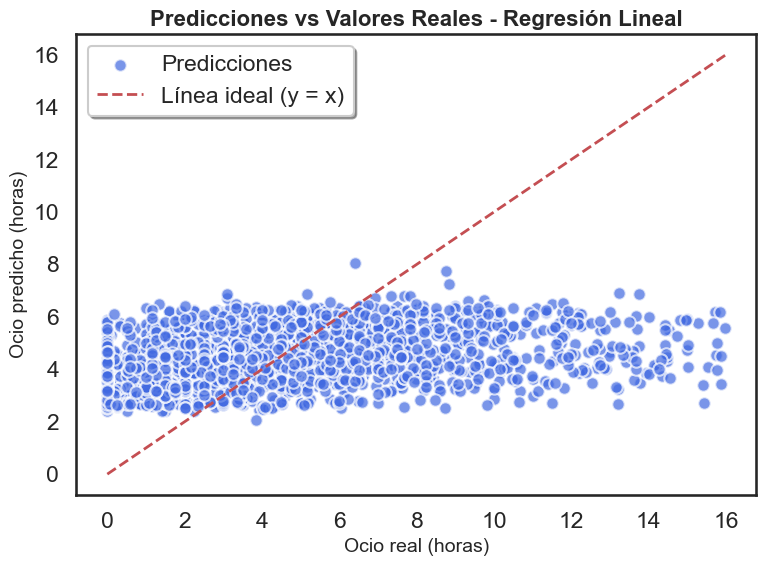

In [133]:
# Estilo limpio sin cuadrícula
sns.set(style="white", context="talk")  # cambia "whitegrid" por "white"

plt.figure(figsize=(8, 6))

# Dispersión con estilo profesional
plt.scatter(Y_test, y_pred_test, alpha=0.7, color='royalblue',
            edgecolor='white', s=80, label='Predicciones')

# Línea de referencia (predicción perfecta)
plt.plot(
    [Y_test.min(), Y_test.max()],
    [Y_test.min(), Y_test.max()],
    'r--', lw=2, label='Línea ideal (y = x)'
)

# Etiquetas y título
plt.xlabel('Ocio real (horas)', fontsize=14)
plt.ylabel('Ocio predicho (horas)', fontsize=14)
plt.title('Predicciones vs Valores Reales - Regresión Lineal',
          fontsize=16, weight='bold')

# Quitar cuadrícula (por si el estilo la agrega por defecto)
plt.grid(False)

# Leyenda estilizada
plt.legend(frameon=True, fancybox=True, shadow=True, loc='upper left')

# Ajuste de márgenes
plt.tight_layout()

# Mostrar
plt.show()

Umbral P25 de tiempo de ocio: 1.93 horas


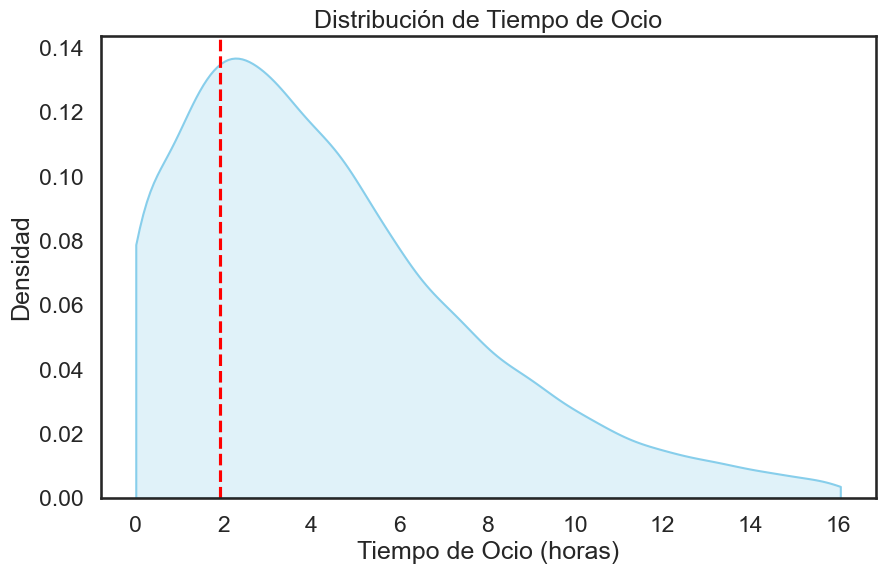

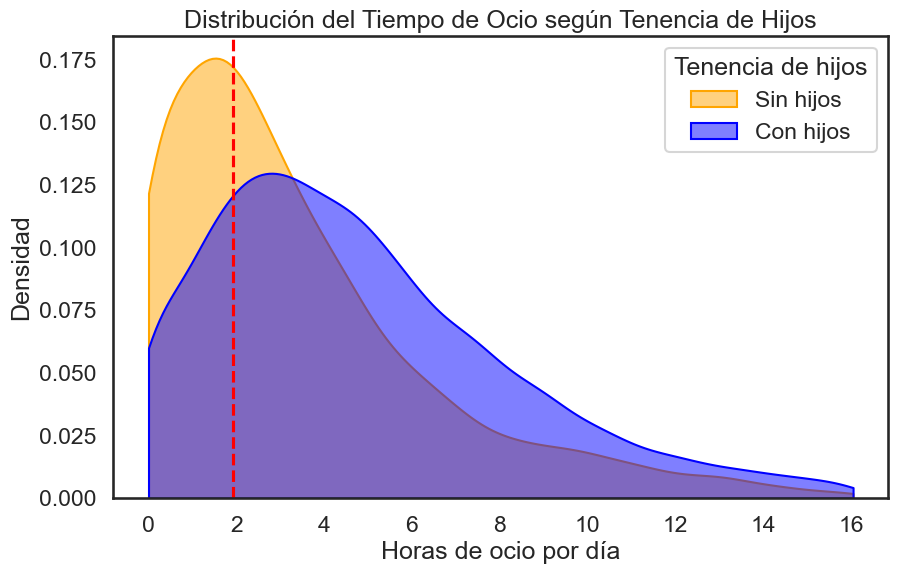

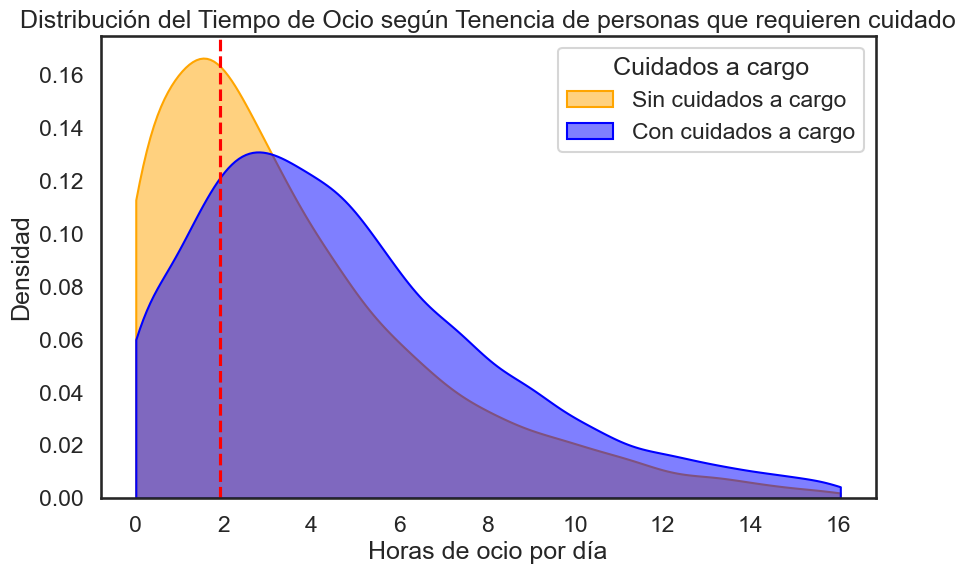

In [114]:
# Analisis descriptivo, distribucion de la clase 

# Calculamos el percentil 25 en el conjunto de entrenamiento
p25 = Y_train.quantile(0.25)
print(f"Umbral P25 de tiempo de ocio: {p25:.2f} horas")

# Creamos la variable categórica: 1 si ocio < P25, 0 en otro caso
df_1['OCIO_BAJO'] = np.where(df_1['TIEMPO_OCIO'] < p25, 1, 0)


# Graficamos la distribucion del tiempo de ocio 

from matplotlib.lines import lineStyles
# Distribución de tiempo de ocio
plt.figure(figsize=(10, 6))
sns.kdeplot(df_1['TIEMPO_OCIO'], fill=True, color='skyblue',clip=(0, df_1['TIEMPO_OCIO'].max()))
plt.title('Distribución de Tiempo de Ocio')
plt.xlabel('Tiempo de Ocio (horas)')
plt.ylabel('Densidad')
# Línea vertical del umbral P25
plt.axvline(p25, color='red', linestyle='--', label=f'P25 = {p25:.2f}h')

# Quitar la cuadrícula
plt.grid(False)

plt.show()

# Comparando tenencia o no de hijos 
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_1,
    x='TIEMPO_OCIO',
    hue='TENENCIA_HIJOS_BIN',
    fill=True,
    common_norm=False,
    palette=['blue', 'orange'],
    alpha=0.5,
    clip=(0, df_1['TIEMPO_OCIO'].max())  # Limita el KDE al rango real
)

# Línea vertical del umbral P25
plt.axvline(p25, color='red', linestyle='--', label=f'P25 = {p25:.2f}h')

plt.title('Distribución del Tiempo de Ocio según Tenencia de Hijos')
plt.xlabel('Horas de ocio por día')
plt.ylabel('Densidad')
plt.legend(title='Tenencia de hijos', labels=['Sin hijos', 'Con hijos'])
plt.show()

# Comparando tenencia o no de personas que requieren cuidados 
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_1,
    x='TIEMPO_OCIO',
    hue='TENENCIA_CUIDADOS_BIN',
    fill=True,
    common_norm=False,
    palette=['blue', 'orange'],
    alpha=0.5,
    clip=(0, df_1['TIEMPO_OCIO'].max())  # Limita el KDE al rango real
)

# Línea vertical del umbral P25
plt.axvline(p25, color='red', linestyle='--', label=f'P25 = {p25:.2f}h')

plt.title('Distribución del Tiempo de Ocio según Tenencia de personas que requieren cuidado')
plt.xlabel('Horas de ocio por día')
plt.ylabel('Densidad')
plt.legend(title='Cuidados a cargo', labels=['Sin cuidados a cargo', 'Con cuidados a cargo'])
plt.show()


### LOGIT

In [122]:
# Separamos la muestra en entrenamiento y testeo 

X_logit = df_1[['EDAD_SEL', 'TENENCIA_HIJOS_BIN','CONDICION_ACTIVIDAD', 'TENENCIA_CUIDADOS_BIN',
       'CASADO_UNIDO_BIN', 'SEXO_BIN', 'EDAD_SEL2',
       'NIVEL_EDU_Primario incompleto', 'NIVEL_EDU_Primario completo',
       'NIVEL_EDU_Secundario incompleto', 'NIVEL_EDU_Secundario completo',
       'NIVEL_EDU_Terciario o universitario incompleto',
       'NIVEL_EDU_Terciario o universitario completo y más',
       'NIVEL_EDU_Educación especial']]

Y_logit = df_1['OCIO_BAJO']

num_vars = ['EDAD_SEL', 'EDAD_SEL2'] # Las variables que hay que escalar 
dummy_vars = ['TENENCIA_HIJOS_BIN','CONDICION_ACTIVIDAD', 'TENENCIA_CUIDADOS_BIN',
       'CASADO_UNIDO_BIN', 'SEXO_BIN',
       'NIVEL_EDU_Primario incompleto', 'NIVEL_EDU_Primario completo',
       'NIVEL_EDU_Secundario incompleto', 'NIVEL_EDU_Secundario completo',
       'NIVEL_EDU_Terciario o universitario incompleto',
       'NIVEL_EDU_Terciario o universitario completo y más',
       'NIVEL_EDU_Educación especial'] # Las variables que no hay que escalar 

sc = StandardScaler()
X_scaled = sc.fit_transform(X_logit[num_vars])
X_scaled = pd.DataFrame(X_scaled, columns=num_vars, index=X_logit.index) # Index para mantener el mismo indice
X_logit = pd.concat([X_scaled, X_logit[dummy_vars].reset_index(drop=True)], axis=1)



# Dividir los datos
X_train_logit, X_test_logit, Y_train_logit, Y_test_logit = train_test_split(X_logit, Y_logit, test_size=0.2, random_state=91218)

# Comprobamos que las observaciones se hayan asignado igual que en el MCO 
print((X_train_logit.index == X_train.index).all()) # da: True
print((X_test_logit.index == X_test.index).all()) # da: True
print((Y_train_logit.index == Y_train.index).all()) # da: True
print((Y_test_logit.index == Y_test.index).all()) # da: True

True
True
True
True


In [132]:
X_train_sm = sm.add_constant(X_train_logit, has_constant='add')
X_test_sm = sm.add_constant(X_test_logit, has_constant='add')

logit_model = sm.Logit(Y_train_logit, X_train_sm).fit(disp=False)

# --- Resumen de coeficientes con significancia ---
coef_table = logit_model.summary2().tables[1].copy()

# Función para asignar estrellas según p-valor
def significance_stars(p):
    if p < 0.01:
        return '***'
    elif p < 0.05:
        return '**'
    elif p < 0.1:
        return '*'
    else:
        return ''

# Agregamos columna de estrellas
coef_table['signif'] = coef_table['P>|z|'].apply(significance_stars)

print("\n--- Resumen Logit (coeficientes con significancia) ---")
print(coef_table)

var_interes = ['TENENCIA_HIJOS_BIN', 'CASADO_UNIDO_BIN']

for var in var_interes:
    coef = logit_model.params[var]
    sign = 'positivo' if coef > 0 else 'negativo' if coef < 0 else 'cero'
    print(f"Coeficiente {var}: {coef:.4f} ({sign})")

y_pred_prob_logit = logit_model.predict(X_test_sm)           # Probabilidad
y_pred_logit = (y_pred_prob_logit >= 0.5).astype(int)        # Predicción binaria

# --- Evaluación ---
acc_logit = accuracy_score(Y_test_logit, y_pred_logit)
error_logit = 1 - acc_logit
print(f"\nLogit - Accuracy: {acc_logit:.4f} | Error rate: {error_logit:.4f}")


--- Resumen Logit (coeficientes con significancia) ---
                                                       Coef.  Std.Err.         z         P>|z|    [0.025    0.975] signif
const                                              -1.552044  0.315407 -4.920770  8.620424e-07 -2.170230 -0.933858    ***
EDAD_SEL                                            1.321583  0.186520  7.085468  1.385751e-12  0.956010  1.687156    ***
EDAD_SEL2                                          -1.517048  0.197164 -7.694342  1.422241e-14 -1.903482 -1.130613    ***
TENENCIA_HIJOS_BIN                                  0.246622  0.154912  1.592012  1.113819e-01 -0.057000  0.550244       
CONDICION_ACTIVIDAD                                 0.627981  0.066889  9.388417  6.090855e-21  0.496881  0.759081    ***
TENENCIA_CUIDADOS_BIN                               0.339826  0.147260  2.307655  2.101831e-02  0.051201  0.628450     **
CASADO_UNIDO_BIN                                    0.107615  0.057000  1.887990  5.902733

### CART

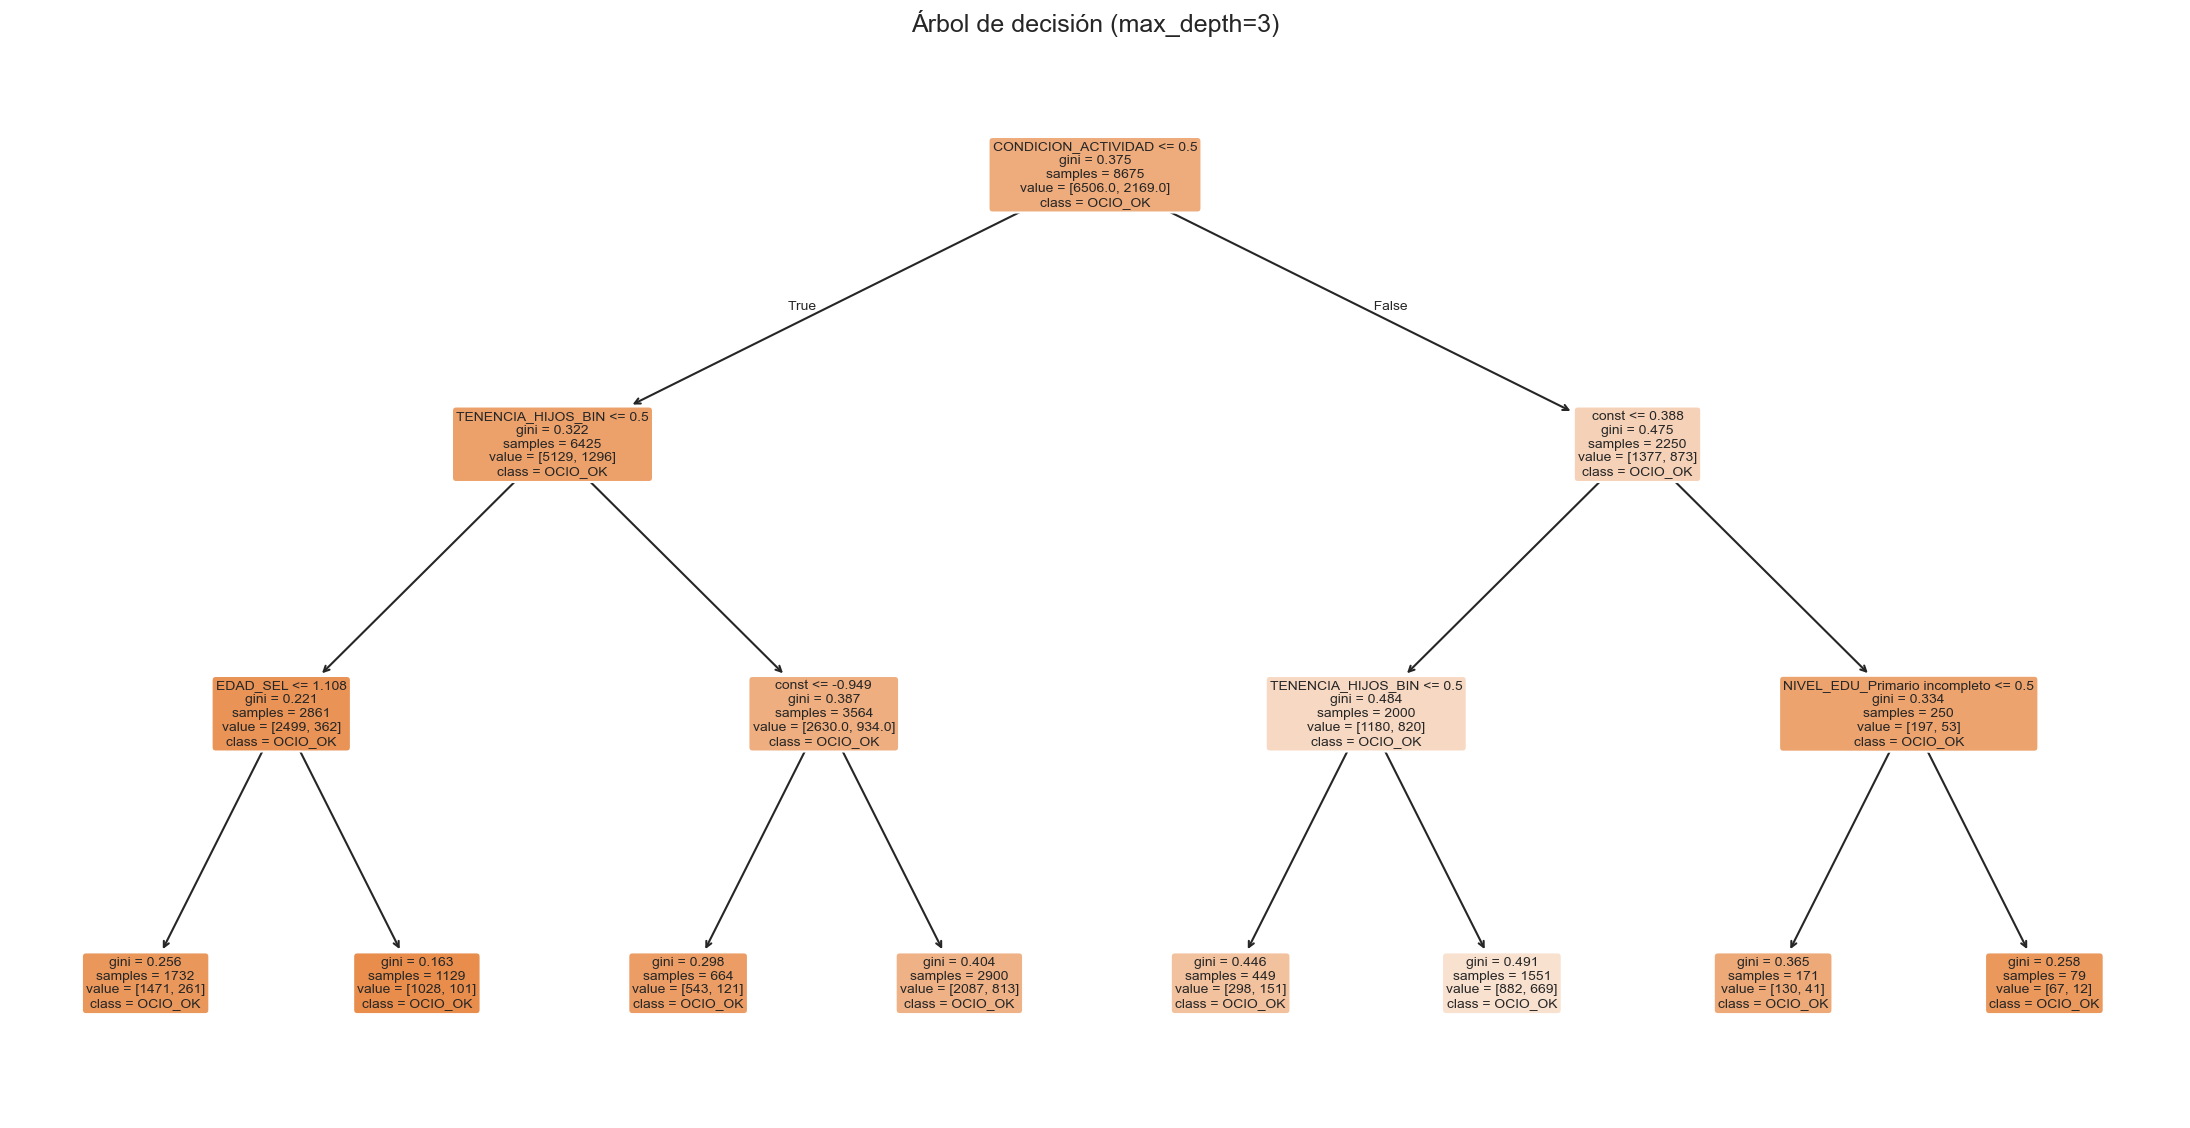


--- Reglas del árbol (texto) ---

|--- TENENCIA_HIJOS_BIN <= 0.50
|   |--- CONDICION_ACTIVIDAD <= 0.50
|   |   |--- EDAD_SEL2 <= 1.11
|   |   |   |--- class: 0
|   |   |--- EDAD_SEL2 >  1.11
|   |   |   |--- class: 0
|   |--- CONDICION_ACTIVIDAD >  0.50
|   |   |--- EDAD_SEL <= -0.95
|   |   |   |--- class: 0
|   |   |--- EDAD_SEL >  -0.95
|   |   |   |--- class: 0
|--- TENENCIA_HIJOS_BIN >  0.50
|   |--- EDAD_SEL <= 0.39
|   |   |--- CONDICION_ACTIVIDAD <= 0.50
|   |   |   |--- class: 0
|   |   |--- CONDICION_ACTIVIDAD >  0.50
|   |   |   |--- class: 0
|   |--- EDAD_SEL >  0.39
|   |   |--- NIVEL_EDU_Primario completo <= 0.50
|   |   |   |--- class: 0
|   |   |--- NIVEL_EDU_Primario completo >  0.50
|   |   |   |--- class: 0



In [148]:
#  AJUSTE DEL CART (DecisionTreeClassifier)
cart = DecisionTreeClassifier(max_depth=3, random_state=91218)
cart.fit(X_train_logit, Y_train_logit)

# Visualizar árbol
plt.figure(figsize=(28,14))
plot_tree(cart, feature_names=X_train.columns, class_names=['OCIO_OK','OCIO_BAJO'],
           filled=True, rounded=True, fontsize=10)
plt.title('Árbol de decisión (max_depth=3)')
plt.savefig("arbol_ocio.png", dpi=300, bbox_inches='tight')
plt.show()
# Mostrar reglas textuales del árbol (completo, hasta profundidad especificada)
rules_text = export_text(cart, feature_names=list(X_train_logit.columns))
print("\n--- Reglas del árbol (texto) ---\n")
print(rules_text)

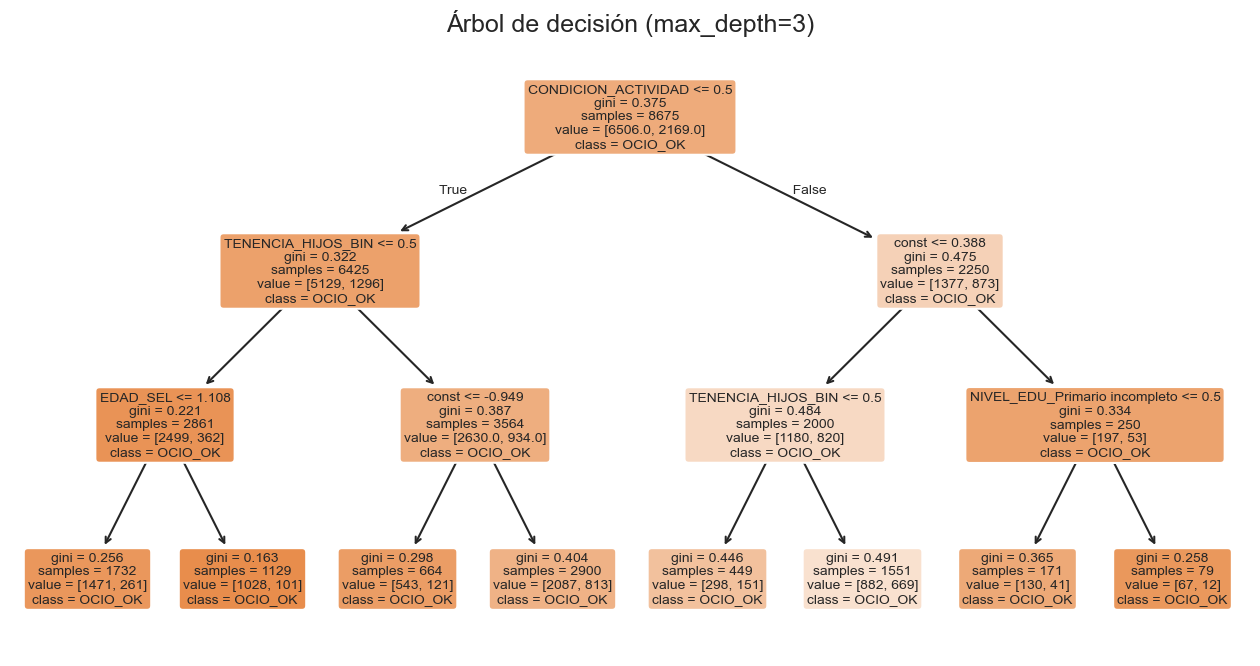


--- Reglas del árbol (texto) ---

|--- TENENCIA_HIJOS_BIN <= 0.50
|   |--- CONDICION_ACTIVIDAD <= 0.50
|   |   |--- EDAD_SEL2 <= 1.11
|   |   |   |--- class: 0
|   |   |--- EDAD_SEL2 >  1.11
|   |   |   |--- class: 0
|   |--- CONDICION_ACTIVIDAD >  0.50
|   |   |--- EDAD_SEL <= -0.95
|   |   |   |--- class: 0
|   |   |--- EDAD_SEL >  -0.95
|   |   |   |--- class: 0
|--- TENENCIA_HIJOS_BIN >  0.50
|   |--- EDAD_SEL <= 0.39
|   |   |--- CONDICION_ACTIVIDAD <= 0.50
|   |   |   |--- class: 0
|   |   |--- CONDICION_ACTIVIDAD >  0.50
|   |   |   |--- class: 0
|   |--- EDAD_SEL >  0.39
|   |   |--- NIVEL_EDU_Primario completo <= 0.50
|   |   |   |--- class: 0
|   |   |--- NIVEL_EDU_Primario completo >  0.50
|   |   |   |--- class: 0



In [149]:
# opcional
cart = DecisionTreeClassifier(max_depth=3, random_state=91218)
cart.fit(X_train_logit, Y_train_logit)

# Visualizar árbol
plt.figure(figsize=(16,8))
plot_tree(cart, feature_names=X_train.columns, class_names=['OCIO_OK','OCIO_BAJO'], filled=True, rounded=True, fontsize=10)
plt.title('Árbol de decisión (max_depth=3)')
plt.show()

# Mostrar reglas textuales del árbol (completo, hasta profundidad especificada)
rules_text = export_text(cart, feature_names=list(X_train_logit.columns))
print("\n--- Reglas del árbol (texto) ---\n")
print(rules_text)


In [150]:
# identificación de la hoja con mayor probabilidad de clase 1
tree = cart.tree_
# Cada leaf node has value: tree.value[node] -> array [[n_class0, n_class1]]
leaf_indices = np.where(tree.children_left == -1)[0]
leaf_probs = []
for leaf in leaf_indices:
    counts = tree.value[leaf][0]  # [n0, n1]
    prob1 = counts[1] / counts.sum() if counts.sum() > 0 else 0
    leaf_probs.append((leaf, prob1, counts.sum()))


In [151]:
# Seleccionar la hoja con mayor probabilidad de clase 1
leaf_best = max(leaf_probs, key=lambda x: (x[1], x[2]))  # prioriza prob, desempata por tamaño
leaf_id_best = leaf_best[0]
leaf_best_prob = leaf_best[1]
leaf_best_n = leaf_best[2]
print(f"\nHoja con mayor probabilidad de OCIO_BAJO: node {leaf_id_best} | prob={leaf_best_prob:.3f} | n={leaf_best_n}")



Hoja con mayor probabilidad de OCIO_BAJO: node 11 | prob=0.431 | n=1.0


In [152]:
def get_rule_for_node(tree, feature_names, target_node_id):
    """
    Devuelve la regla (camino desde la raíz) que lleva al nodo indicado.
    """
    left = tree.children_left
    right = tree.children_right
    threshold = tree.threshold
    features = [feature_names[i] if i != -2 else "undefined!" for i in tree.feature]

    def recurse(current_node, target_node, conditions):
        if current_node == target_node:
            return True, conditions
        if left[current_node] != -1:
            cond = f"({features[current_node]} <= {threshold[current_node]:.4f})"
            found, c = recurse(left[current_node], target_node, conditions + [cond])
            if found:
                return True, c
        if right[current_node] != -1:
            cond = f"({features[current_node]} > {threshold[current_node]:.4f})"
            found, c = recurse(right[current_node], target_node, conditions + [cond])
            if found:
                return True, c
        return False, None

    found, conds = recurse(0, target_node_id, [])
    if not found or conds is None:
        return "⚠️ No se encontró la regla para este nodo."
    return " AND ".join(conds)

In [153]:
rule_best = get_rule_for_node(tree, list(X_train.columns), leaf_id_best)
print("\nRegla (camino) hacia la hoja con mayor probabilidad de OCIO_BAJO:")
print(rule_best)


Regla (camino) hacia la hoja con mayor probabilidad de OCIO_BAJO:
(CONDICION_ACTIVIDAD > 0.5000) AND (const <= 0.3882) AND (TENENCIA_HIJOS_BIN > 0.5000)


In [155]:
# Para el modelo LOGIT
acc_logit = accuracy_score(Y_test_logit, y_pred_logit)
error_logit = 1 - acc_logit
print(f"Logit - Accuracy: {acc_logit:.4f} | Tasa de error: {error_logit:.4f}")

# Para el modelo CART
y_pred_cart = cart.predict(X_test_logit)
acc_cart = accuracy_score(Y_test_logit, y_pred_cart)
error_cart = 1 - acc_cart
print(f"CART - Accuracy: {acc_cart:.4f} | Tasa de error: {error_cart:.4f}")

# Comparación final
print("\n--- Comparación ---")
print(f"Logit: Accuracy = {acc_logit:.3f} | Error = {error_logit:.3f}")
print(f"CART:  Accuracy = {acc_cart:.3f} | Error = {error_cart:.3f}")

Logit - Accuracy: 0.7455 | Tasa de error: 0.2545
CART - Accuracy: 0.7469 | Tasa de error: 0.2531

--- Comparación ---
Logit: Accuracy = 0.746 | Error = 0.254
CART:  Accuracy = 0.747 | Error = 0.253


In [ ]:
print("\nSugerencia de interpretación:")
print("- Si coef(TENENCIA_HIJOS_BIN) > 0 (logit): ser padre/madre aumenta la probabilidad de OCIO_BAJO.")
print("- Si coef(CASADO_UNIDO_BIN) > 0 (logit): estar casado/unido aumenta la probabilidad de OCIO_BAJO.")
print("- En el CART, revisar la regla impresa arriba para ver la combinación de condiciones que más asocian con OCIO_BAJO.")